# Business Problem
In recent years, City Hotel and Resort Hotel have seen high cancellation rates. Each hotel is now dealing with a number of issues as a result, including fewer revenues and less than ideal hotel room use. Consequently, lowering cancellation rates is both hotels' primary goal in order to increase their efficiency in generating revenue, and for us to offer thorough business advice this problem.

The analysis of hotel booking cancellations as well as other factors that have no bearing on their business and yearly revenue generation are the main topics of this report.

# Research Question
1. What are the variables that affect hotel reservation cancellations?
2. How can we make hotel reservations cancellations better?
3. How will hotels be assisted in making pricing and promotional decisions? 

# Hypothesis
1. More cancellations occur when prices are higher.
2. When there is longer waiting list, customers tend to cancel more frequently.
3. The majority of clients are coming from offline travel agents to make their reservations.

# Importing Libraries

In [244]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')

# Loading the dataset

In [246]:
hotel_df = pd.read_csv('hotel_booking.csv')

# Exploratory Data Analysis and Data Cleaning

In [354]:
hotel_df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,7
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,7
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,7
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,7
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,7
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,7
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,107.0,0,0,Check-Out,2015-07-03,7
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,103.0,0,1,Check-Out,2015-07-03,7
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,0,No Deposit,0,Transient,82.0,0,1,Canceled,2015-05-06,5
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,0,No Deposit,0,Transient,105.5,0,0,Canceled,2015-04-22,4


In [346]:
hotel_df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06,9
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07,9
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07,9
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07,9
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,0,No Deposit,0,Transient,151.20,0,2,Check-Out,2017-09-07,9


In [250]:
hotel_df.shape

(119390, 32)

In [251]:
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [252]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [253]:
hotel_df['reservation_status_date'] = pd.to_datetime(hotel_df['reservation_status_date'], dayfirst=True)

In [254]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [255]:
hotel_df.describe( include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [256]:
for col in hotel_df.describe(include = 'object').columns:
    print(col)
    print(hotel_df[col].unique())
    print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [257]:
hotel_df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [258]:
hotel_df.drop(['company','agent'], axis = 1, inplace = True)

In [259]:
hotel_df.dropna(inplace = True)

In [260]:
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


<Axes: >

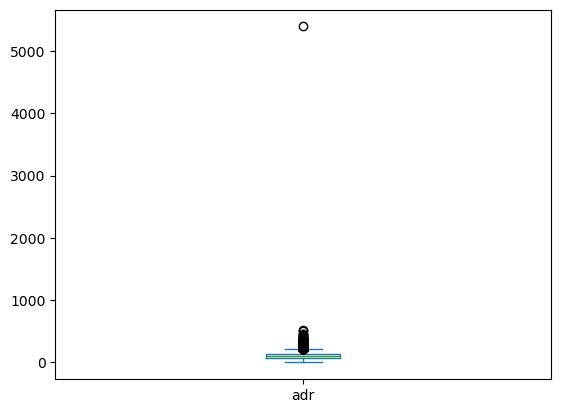

In [261]:
hotel_df['adr'].plot(kind = 'box')

In [262]:
hotel_df = hotel_df[hotel_df['adr']<5000]

# Data Analysis and Visualizations

is_canceled
0    0.628653
1    0.371347
Name: proportion, dtype: float64


<BarContainer object of 2 artists>

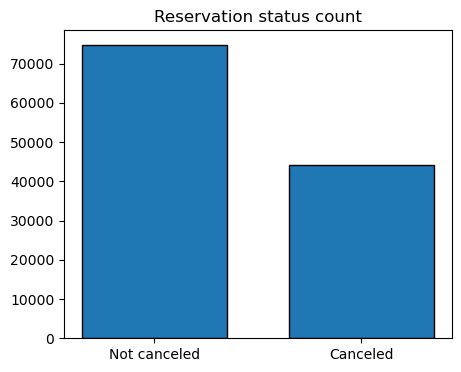

In [264]:
cancelled_perc = hotel_df['is_canceled'].value_counts(normalize = True)
print(cancelled_perc)

plt.figure(figsize = (5,4))
plt.title('Reservation status count')
plt.bar(['Not canceled', 'Canceled'],hotel_df['is_canceled'].value_counts(), edgecolor = 'k', width = 0.7)

In [265]:
hotel_df['is_canceled']= hotel_df['is_canceled'].astype(str)

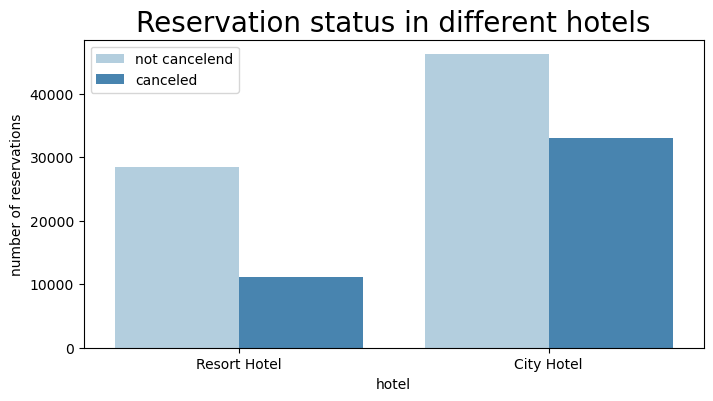

In [266]:
plt.figure(figsize = (8,4))
ax1 = sns.countplot(x = 'hotel', hue = 'is_canceled', data = hotel_df, palette = 'Blues')
legend_labels,_ = ax1. get_legend_handles_labels()
plt.title('Reservation status in different hotels', size = 20)
plt.xlabel('hotel')
plt.ylabel('number of reservations')
plt.legend(['not cancelend','canceled'])
plt.show()

In [267]:
resort_hotel = hotel_df[hotel_df['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize = True)

is_canceled
0    0.72025
1    0.27975
Name: proportion, dtype: float64

In [268]:
city_hotel = hotel_df[hotel_df['hotel'] == 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize = True)

is_canceled
0    0.582918
1    0.417082
Name: proportion, dtype: float64

In [269]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

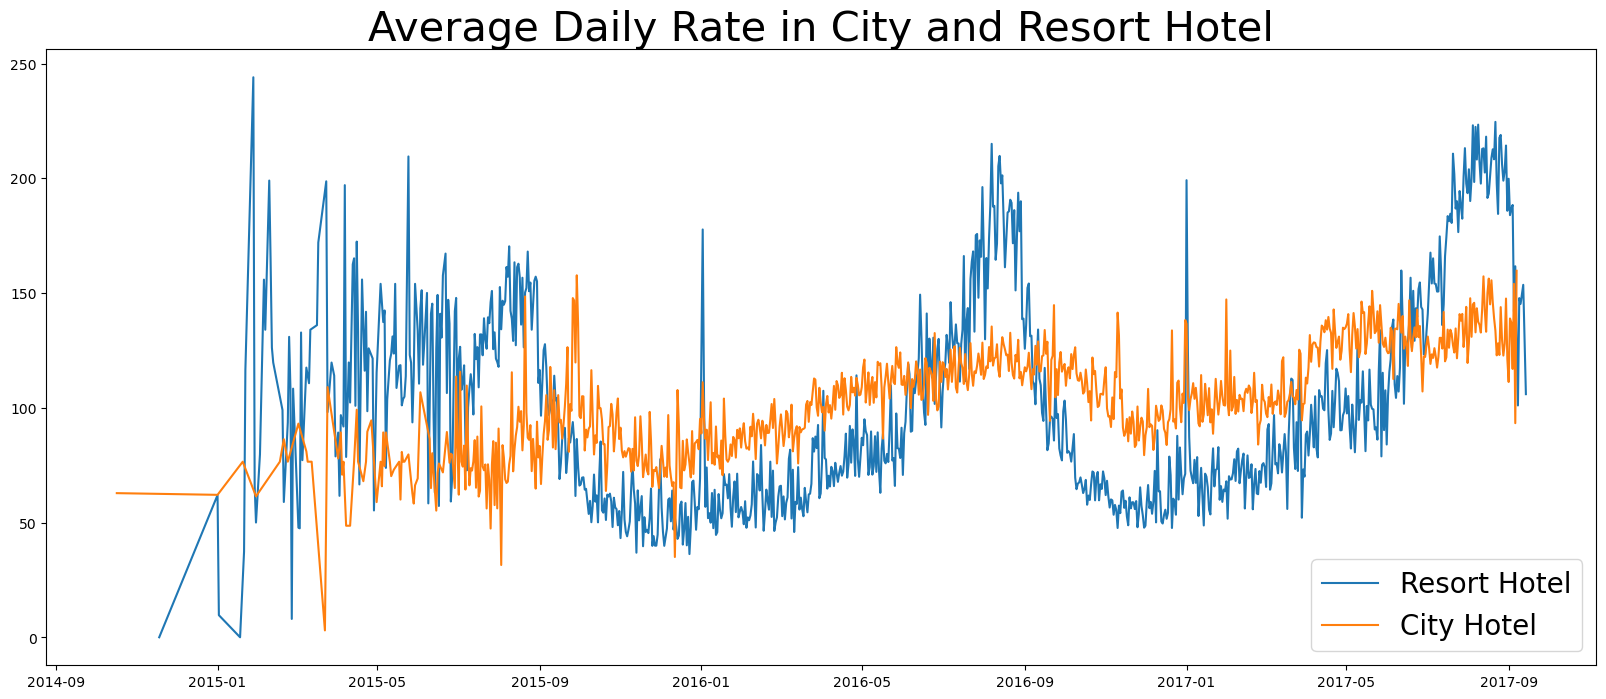

In [270]:
plt.figure(figsize = (20,8))
plt.title('Average Daily Rate in City and Resort Hotel', fontsize = 30)
plt.plot(resort_hotel.index, resort_hotel['adr'], label = 'Resort Hotel')
plt.plot(city_hotel.index, city_hotel['adr'], label = 'City Hotel')
plt.legend(fontsize = 20)
plt.show()

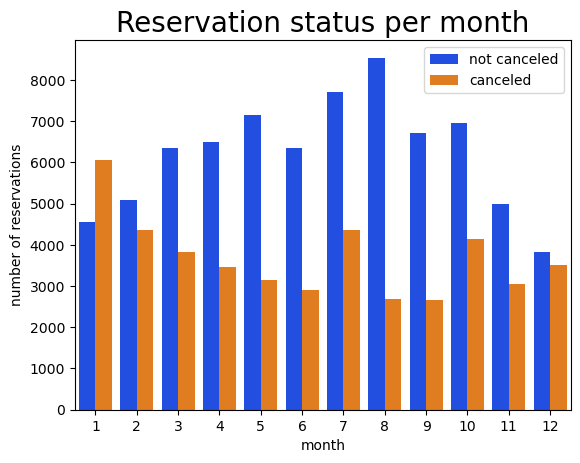

In [271]:
hotel_df['month'] = hotel_df['reservation_status_date'].dt.month
plt.figure(figure = (160,20))
ax1 = sns.countplot(x = 'month', hue = 'is_canceled', data = hotel_df, palette = 'bright')
legend_labels,_= ax1. get_legend_handles_labels()
plt.title('Reservation status per month', size = 20)
plt.xlabel('month')
plt.ylabel('number of reservations')
plt.legend(['not canceled', 'canceled'])
plt.show()

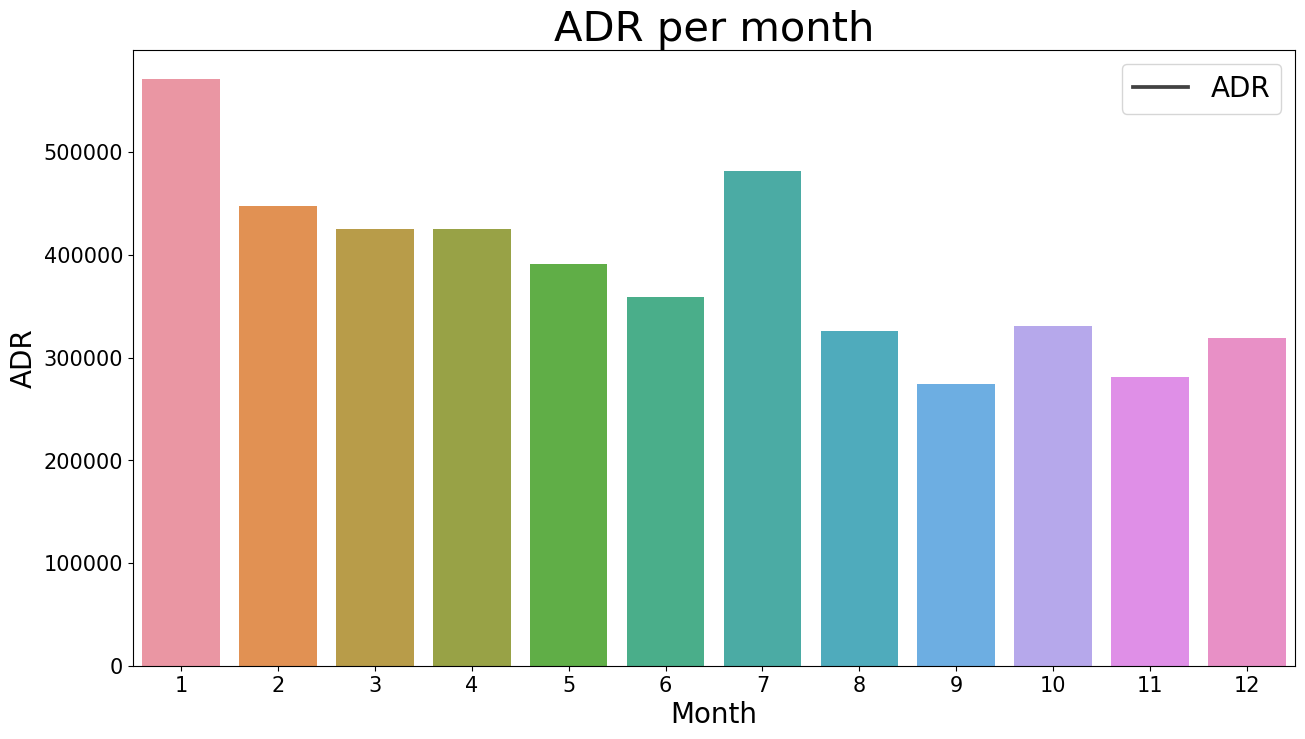

In [272]:
plt.figure(figsize = (15,8))
plt.title('ADR per month', fontsize = 30)
sns.barplot( x= 'month', y='adr', data = hotel_df[hotel_df['is_canceled'] == '1'].groupby('month')[['adr']].sum().reset_index())
grouped_data = hotel_df[hotel_df['is_canceled'] == '1'].groupby('month')[['adr']].sum().reset_index()

# Check if grouped_data is empty before plotting
if not grouped_data.empty:
    sns.barplot(x='month', y='adr', data=grouped_data)
    plt.xlabel('Month', fontsize=20)
    plt.ylabel('ADR', fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(['ADR'], fontsize=20)
    plt.show()
else:
    print("No data found for canceled reservations.")

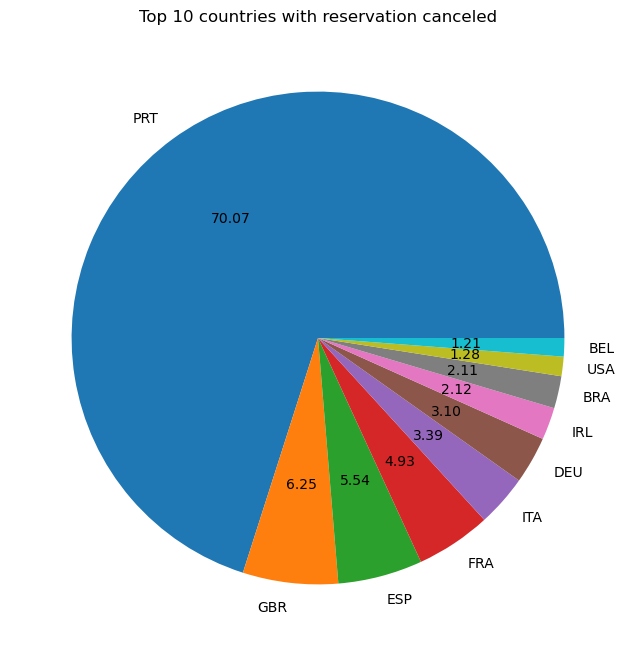

In [374]:
cancelled_data = hotel_df[hotel_df["is_canceled"] == "1"]
top_10_country = cancelled_data['country'].value_counts()[:10]
plt.figure(figsize = (8,8))
plt.title('Top 10 countries with reservation canceled')
plt.pie(top_10_country, autopct = '%.2f', labels = top_10_country.index)
plt.show()

In [376]:
hotel_df['market_segment'].value_counts()

market_segment
Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: count, dtype: int64

In [378]:
hotel_df['market_segment'].value_counts(normalize = True)

market_segment
Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: proportion, dtype: float64

In [380]:
cancelled_data['market_segment'].value_counts(normalize = True)

market_segment
Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: proportion, dtype: float64

In [396]:
not_cancelled_df = hotel_df[hotel_df["is_canceled"] == "0"]

In [422]:
cancelled_df_adr = cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_df_adr.reset_index(inplace = True)
cancelled_df_adr.sort_values('reservation_status_date', inplace = True)

not_cancelled_df_adr = not_cancelled_df.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_df_adr.reset_index(inplace = True)
not_cancelled_df_adr.sort_values('reservation_status_date', inplace = True)

In [424]:
cancelled_df_adr = cancelled_df_adr[(cancelled_df_adr['reservation_status_date']>'2016') & (cancelled_df_adr['reservation_status_date']<'2017-09')]
not_cancelled_df_adr = not_cancelled_df_adr[(not_cancelled_df_adr['reservation_status_date']>'2016') & (not_cancelled_df_adr['reservation_status_date']<'2017-09')]

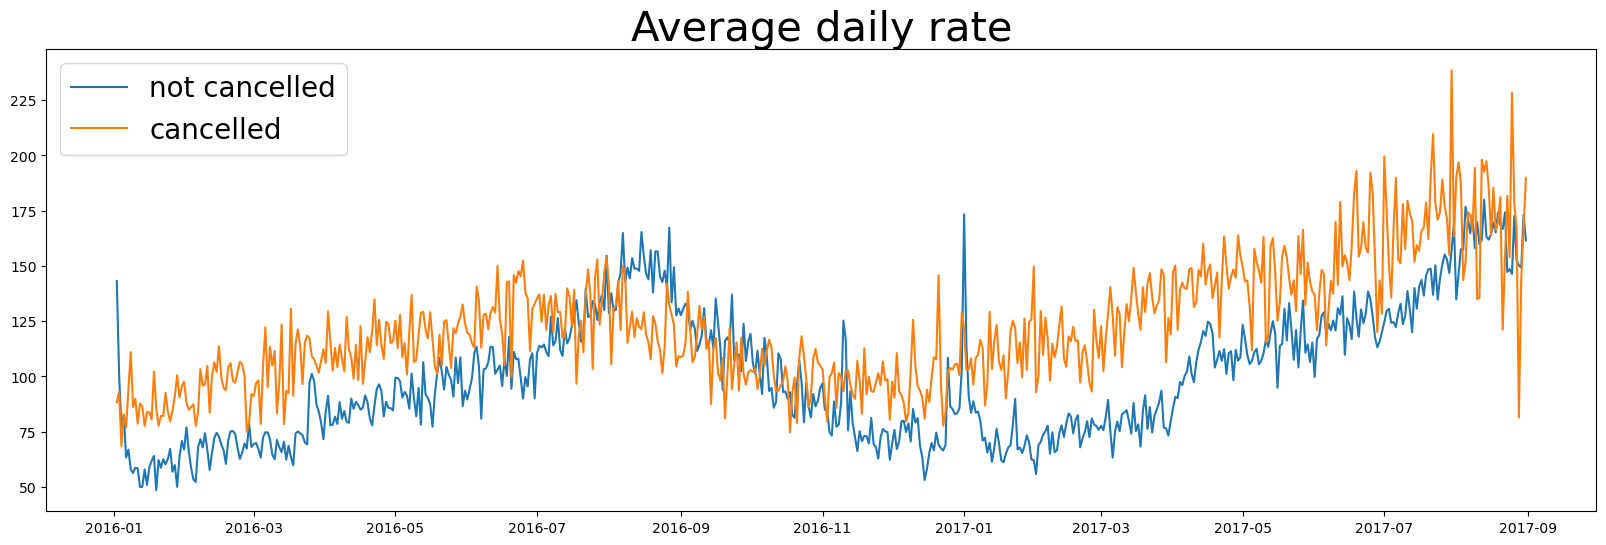

In [426]:
plt.figure(figsize = (20,6))
plt.title('Average daily rate', fontsize = 30)
plt.plot(not_cancelled_df_adr['reservation_status_date'], not_cancelled_df_adr['adr'], label = 'not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'], cancelled_df_adr['adr'], label = 'cancelled')
plt.legend(fontsize = 20)

# Analysis and Findings

- Reservation status count: The accompanying bar graph shows the percentage of reservations that are canceled and those that are not. It is obvious that there are still significant number of reservations that have not been canceled. There are still 37% of clients who canceled their reservation, which has a significant impact on the hotels' earnings.
- Reservation status in different hotels: In comparison to resort hotels, city hotels have more bookings. It's possible that resort hotels are more expensive than those in cities.
- Average Daily Ratein City and Resort Hotel: The line graph shows that, on certain days, the average daily rate for a city hotel is less than that of a resort hotel, and on other days, it is even less. It goes without saying that weekends and holidays may see a rise in resort hotel rates.
- Reservation status per month: We have developed the grouped bar graph to analyze the months with the highest and lowest reservation levels accodring to reservation status. As can be seen, both the number of confirmed reservations and the number of canceled reservations are largest in the month of August, whereas January is the month with the most canceled reservation.

# Suggestions
1. Cancellation rates rise as the price does. In order to prevent cancellations of reservations, hotels could work on their pricing strategies and try to lower the rates for specific hotels based on locations. They can also provide some discounts to the customers.
2. As the ratio of the cancellation and not cancellation of the resort hotel is higer tin the resort hotel than the city hotels, the hotels should provide a reasonable discount on the room prices on weekends or on holidays.
3. In the month of January, hotels can start campaigns or marketing with a reasonable amount to increase their revenue as the cancellation is the highest in this month.
4. They can also increase the quality of their hotels and their services mainly in Portugal to resuce cancellation rate. 